In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# uses the 2020 disposable income metrics (national)
cons_raw = pd.read_csv('data/consumption_percentages_2020_disposableincome.csv', sep=';', decimal=',', comment='#', header=0, index_col=0)
# clear out unnecessary columns
cons_raw.drop(['year', 'total'], axis=1, inplace=True)
# rename the indices
cons_raw.index = [f'{num}th' for num, _ in enumerate(cons_raw.index)]

In [ ]:
# shrink items to necessary/unnecessary consumption
cons_1st_items = ['food_drinks', 'house_monthly_expenses', 'health', 'transport', 'communication', 'education']
cons_2nd_items = ['charities', 'restaurants_hotels', 'goods_services', 'recreation_culture', 'household_appliances', 'clothing', 'alcohol_tobacco', 'consumption_taxes']

# sanity check
# labels = consumption_rates.columns.to_list()
# for label in consumption_primary + consumption_secondary:
#     if label not in labels:
#         print(f'{label} not in columns')
#     else:
#         labels.remove(label)
# print(labels)

# combine columns to be one

cons_1st = cons_raw[cons_1st_items].sum(axis=1)
cons_2nd = cons_raw[cons_2nd_items].sum(axis=1)

# create aggregated dataframe
cons_combined = pd.DataFrame(data={'primary': cons_1st, 'secondary':cons_2nd}, index=cons_raw.index)

In [15]:
# save combined table
cons_combined.to_pickle('data_model_inputs/consumption_rates_decile_2020.pickletable')

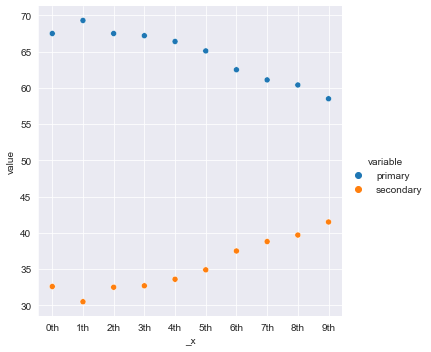

In [14]:
# plotty plot plot
to_plot = pd.melt(cons_combined, value_vars=['primary','secondary'], ignore_index=False)
sns.relplot(data=to_plot, x=to_plot.index, y='value',hue='variable')
# can make a linear interpolation for points (since 1 is the (100-x) of the other